# Sanath path 041 Row 035

1. Load AOI from GeoJson

In [1]:
!ls

01-Sanath-p045r031-Lake-Isabella.ipynb	isa.gif  isabella-lake.geojson


In [2]:
from datetime import datetime

In [3]:
my_aoi_file = 'isabella-lake.geojson'
from notebookLib.nb_display import Ldisplay
ld = Ldisplay()
ld.map_geojson(my_aoi_file)

creating Ldisplay class


In [4]:
import json 

with open(my_aoi_file) as f:
    data = json.load(f)
    
data
    


{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-118.60565185546874, 35.5506639937922],
      [-118.22937011718749, 35.5506639937922],
      [-118.22937011718749, 35.80055084130363],
      [-118.60565185546874, 35.80055084130363],
      [-118.60565185546874, 35.5506639937922]]]}}]}

In [5]:
coord = data['features'][0]['geometry']['coordinates']

x1 = coord[0][0][0]
x1

-118.60565185546874

In [6]:
y1 = coord[0][0][1]
y1

35.5506639937922

In [7]:
x2 = coord[0][2][0]
x2

-118.22937011718749

In [8]:
y2 = coord[0][2][1]
y2

35.80055084130363

In [9]:
import datacube
from odc.ui import with_ui_cbk

In [10]:
dc = datacube.Datacube()
ds = dc.find_datasets(product= "c1l2scenealbers",
                     x=(x1, x2),
                y=(y1, y2),)

In [11]:
len(ds)

147

In [12]:
EPSG='5072'


'''
meas=[ 
    'blue',                              
    'green',                            
    'red',                                
]
'''

meas=[ 
    'swir_1',                              
    'nir',                            
    'green',                                
]

'''
meas=['coastal_aerosol', 
    'blue',                              
    'green',                            
    'red',                                
    'nir',                              
    'swir_1',                             
    'swir_2',                             
    'quality_l2_aerosol']  
'''

ds2 = dc.load(product="c1l2scenealbers",  
                measurements=meas, 
                output_crs='epsg:' + EPSG,
                resolution=(-30, 30),
                x=(x1, x2),
                y=(y1, y2),
                progress_cbk=with_ui_cbk(),
                time=("2014-01-01", "2016-12-31")
              
             )

In [13]:
ds2

<xarray.Dataset>
Dimensions:  (time: 68, x: 1313, y: 1171)
Coordinates:
  * time     (time) datetime64[ns] 2014-01-08T18:29:13.364900 ... 2016-12-31T18:28:09.865399
  * y        (y) float64 1.656e+06 1.656e+06 1.656e+06 ... 1.621e+06 1.621e+06
  * x        (x) float64 -2.012e+06 -2.012e+06 ... -1.973e+06 -1.973e+06
Data variables:
    swir_1   (time, y, x) uint16 5361 4284 2888 2211 ... 3358 3078 3203 2392
    nir      (time, y, x) uint16 3896 3308 2754 2435 ... 2698 2598 2566 1802
    green    (time, y, x) uint16 1682 1315 810 627 822 ... 1398 1388 1443 987
Attributes:
    crs:      epsg:5072

In [14]:
%matplotlib inline
bands = ['swir_1', 'nir', 'green'] #False Colour
no_time_steps = 16
# for time_step in range(no_time_steps):
    #ds2[bands].isel(time=time_step).to_array().plot.imshow(robust=True, figsize=(5, 5))

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Generating 68 frame animation
    Exporting animation to ./isa.gif


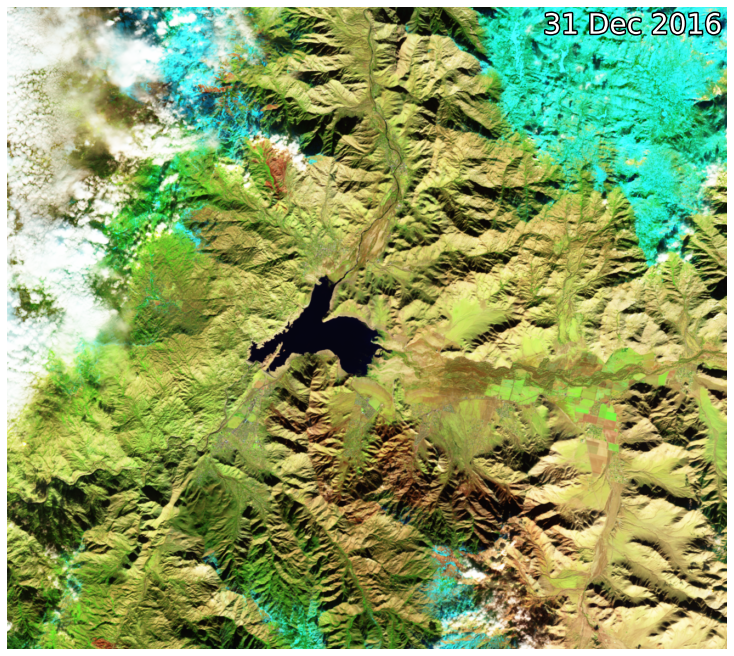

In [15]:
from notebookLib.nb_animate import nb_animated_timeseries

nb_animated_timeseries(ds2,output_path='./isa.gif',bands = ['swir_1', 'nir', 'green'], time_dim='time',  
      percentile_stretch=(.2,.85), interval=600)